There are some research questions you could consider based on the datasets: 

1. **User Behavior Analysis:**
    - How does the number of notifications received impact the screen time?
    - Is there a correlation between the day of the week and screen time?
    - Can we predict screen time based on the number of notifications received?

2. **Health and Lifestyle Analysis:**
    - How does sleep duration vary with age, gender, and weight?
    - Is there a correlation between sleep duration and health score?
    - How does alcohol consumption and smoking habits affect sleep quality (deep sleep duration, REM sleep duration, wakeups, snoring)?
    - How does the heart rate and blood oxygen level vary during different sleep stages (deep, REM)?
    - How does stress level and mood correlate with sleep quality and health score?
    - How does the intake of different medications affect sleep patterns and overall health score?

3. **Physical Activity Analysis:**
    - How does the number of steps, distance covered, and calories burned vary with different exercise types and durations?
    - How does exercise intensity affect the health score and mood?
    - How does ambient temperature and UV exposure affect the amount and intensity of exercise?

4. **Predictive Modeling:**
    - Can we predict the health score based on lifestyle factors (sleep duration, exercise, calories intake, water intake, stress level)?
    - Can we identify anomalies in health data and correlate them with changes in lifestyle or medical conditions?


# Data Analysis

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import missingno as msno
import numpy as np

In [2]:
# Load the datasets
df_activity_environment_data = pd.read_csv('data/activity_environment_data.csv')
df_digital_interaction_data = pd.read_csv('data/digital_interaction_data.csv')
df_personal_health_data = pd.read_csv('data/personal_health_data.csv')

In [3]:
df1_users = set(df_activity_environment_data['User_ID'])
df2_users = set(df_digital_interaction_data['User_ID'])
df3_users = set(df_personal_health_data['User_ID'])


# Check if all users in df1 are in df2 and df3
all_users_same = df1_users.issubset(df2_users) and df1_users.issubset(df3_users)

print("All users in dataset 1 are in the other two datasets:", all_users_same)

All users in dataset 1 are in the other two datasets: True


In [4]:
# Merge the datasets on 'User_ID' and 'Timestamp'
df = pd.merge(df_activity_environment_data, df_digital_interaction_data, on=['User_ID', 'Timestamp'], how='outer')
df = pd.merge(df, df_personal_health_data, on=['User_ID', 'Timestamp'], how='outer')

In [5]:
df.head().T.style.set_properties(**{'background-color': 'grey',
                           'color': 'white',
                           'border-color': 'white'})

,0,1,2,3,4
User_ID,U_00001,U_00002,U_00003,U_00004,U_00005
Timestamp,2021-01-01 00:00:00,2021-01-01 01:00:00,2021-01-01 02:00:00,2021-01-01 03:00:00,2021-01-01 04:00:00
Steps,9146,9362,21,13252,21
Calories_Burned,457.300000,468.100000,1.050000,662.600000,1.050000
Distance_Covered,7.316800,7.489600,0.016800,10.601600,0.016800
Exercise_Type,Running,Yoga,Strength Training,nan,Yoga
Exercise_Duration,1.219675,1.378399,0.803857,0.000000,0.807389
Exercise_Intensity,Low,Moderate,Moderate,nan,High
Ambient_Temperature,27.271525,24.430288,29.340574,25.289230,21.853590
Battery_Level,97.338777,66.573240,30.138828,78.838640,17.673261


In [6]:
df

,User_ID,Timestamp,Steps,Calories_Burned,Distance_Covered,Exercise_Type,Exercise_Duration,Exercise_Intensity,Ambient_Temperature,Battery_Level,...,ECG,Calories_Intake,Water_Intake,Stress_Level,Mood,Skin_Temperature,Body_Fat_Percentage,Muscle_Mass,Health_Score,Anomaly_Flag
0,U_00001,2021-01-01 00:00:00,9146,457.30,7.3168,Running,1.219675,Low,27.271525,97.338777,...,Abnormal,2444.985808,3.105556,Moderate,Neutral,32.752993,17.432985,77.599448,25.992071,1
1,U_00002,2021-01-01 01:00:00,9362,468.10,7.4896,Yoga,1.378399,Moderate,24.430288,66.573240,...,Normal,2199.777020,2.441118,High,Anxious,35.010044,23.957792,71.718936,64.308450,0
2,U_00003,2021-01-01 02:00:00,21,1.05,0.0168,Strength Training,0.803857,Moderate,29.340574,30.138828,...,Abnormal,2182.755640,1.240341,Low,Sad,36.797523,22.995533,59.874936,78.003546,1
3,U_00004,2021-01-01 03:00:00,13252,662.60,10.6016,NaN,0.000000,NaN,25.289230,78.838640,...,Normal,1451.218888,1.682383,Moderate,Happy,32.614592,13.410659,67.528098,16.454106,1
4,U_00005,2021-01-01 04:00:00,21,1.05,0.0168,Yoga,0.807389,High,21.853590,17.673261,...,Normal,1583.562773,1.461862,High,Happy,33.602319,24.920020,54.741487,42.528202,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U_09996,2022-02-21 11:00:00,12443,622.15,9.9544,NaN,0.000000,NaN,34.428771,66.802901,...,Abnormal,2482.932911,1.035077,High,Neutral,34.745721,33.741322,51.081034,30.989037,1
9996,U_09997,2022-02-21 12:00:00,4492,224.60,3.5936,Yoga,0.592288,High,32.068240,62.079895,...,Normal,2196.032378,1.038702,Low,Anxious,37.668751,16.143912,45.321272,33.479601,0
9997,U_09998,2022-02-21 13:00:00,4081,204.05,3.2648,Yoga,0.888462,Moderate,38.776620,85.657028,...,Abnormal,1259.932859,2.063028,Moderate,Sad,36.353827,24.003121,69.109082,63.361551,1
9998,U_09999,2022-02-21 14:00:00,10319,515.95,8.2552,Strength Training,0.922524,Low,34.319393,83.703078,...,Abnormal,2156.686543,1.619009,Moderate,Happy,37.443824,10.134327,36.225962,60.795266,1


In [7]:
total_count = df.shape[0]
diabetes_event_count = df[df['Medical_Conditions'] == "Diabetes"].shape[0]

percentage = (diabetes_event_count / total_count) * 100

print(f"Out of the total {total_count} individuals, {diabetes_event_count} had a diabetes event. This is approximately {percentage:.2f}% of the dataset.")

Out of the total 10000 individuals, 3359 had a diabetes event. This is approximately 33.59% of the dataset.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_ID                 10000 non-null  object 
 1   Timestamp               10000 non-null  object 
 2   Steps                   10000 non-null  int64  
 3   Calories_Burned         10000 non-null  float64
 4   Distance_Covered        10000 non-null  float64
 5   Exercise_Type           7399 non-null   object 
 6   Exercise_Duration       10000 non-null  float64
 7   Exercise_Intensity      7399 non-null   object 
 8   Ambient_Temperature     10000 non-null  float64
 9   Battery_Level           10000 non-null  float64
 10  Altitude                10000 non-null  float64
 11  UV_Exposure             10000 non-null  float64
 12  Notifications_Received  10000 non-null  int64  
 13  Screen_Time             10000 non-null  float64
 14  Age                     10000 non-null 

In [9]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Steps,10000.0,10025.18,5820.39,1.00,4961.75,9962.00,15167.00,20000.00
Calories_Burned,10000.0,501.26,291.02,0.05,248.09,498.10,758.35,1000.00
Distance_Covered,10000.0,8.02,4.66,0.00,3.97,7.97,12.13,16.00
Exercise_Duration,10000.0,0.92,0.66,0.00,0.00,1.00,1.48,2.00
Ambient_Temperature,10000.0,28.11,7.53,15.00,21.48,28.21,34.59,41.00
Battery_Level,10000.0,49.90,29.22,0.02,24.21,49.93,75.38,101.00
Altitude,10000.0,2508.05,1451.11,0.01,1242.65,2498.85,3756.41,4999.65
UV_Exposure,10000.0,4.00,2.31,0.00,2.00,4.03,6.00,8.00
Notifications_Received,10000.0,49.95,28.99,0.00,25.00,50.00,75.00,100.00
Screen_Time,10000.0,4.03,2.29,0.00,2.06,4.02,6.00,8.00


In [10]:
# getting percentage of missing values per feature
df.isna().sum()/len(df)*100

User_ID                    0.00
Timestamp                  0.00
Steps                      0.00
Calories_Burned            0.00
Distance_Covered           0.00
Exercise_Type             26.01
Exercise_Duration          0.00
Exercise_Intensity        26.01
Ambient_Temperature        0.00
Battery_Level              0.00
Altitude                   0.00
UV_Exposure                0.00
Notifications_Received     0.00
Screen_Time                0.00
Age                        0.00
Gender                     0.00
Weight                     0.00
Height                     0.00
Medical_Conditions        33.04
Medication                 0.00
Smoker                     0.00
Alcohol_Consumption       33.60
Day_of_Week                0.00
Sleep_Duration             0.00
Deep_Sleep_Duration        0.00
REM_Sleep_Duration         0.00
Wakeups                    0.00
Snoring                    0.00
Heart_Rate                 0.00
Blood_Oxygen_Level         0.00
ECG                        0.00
Calories

<Axes: >

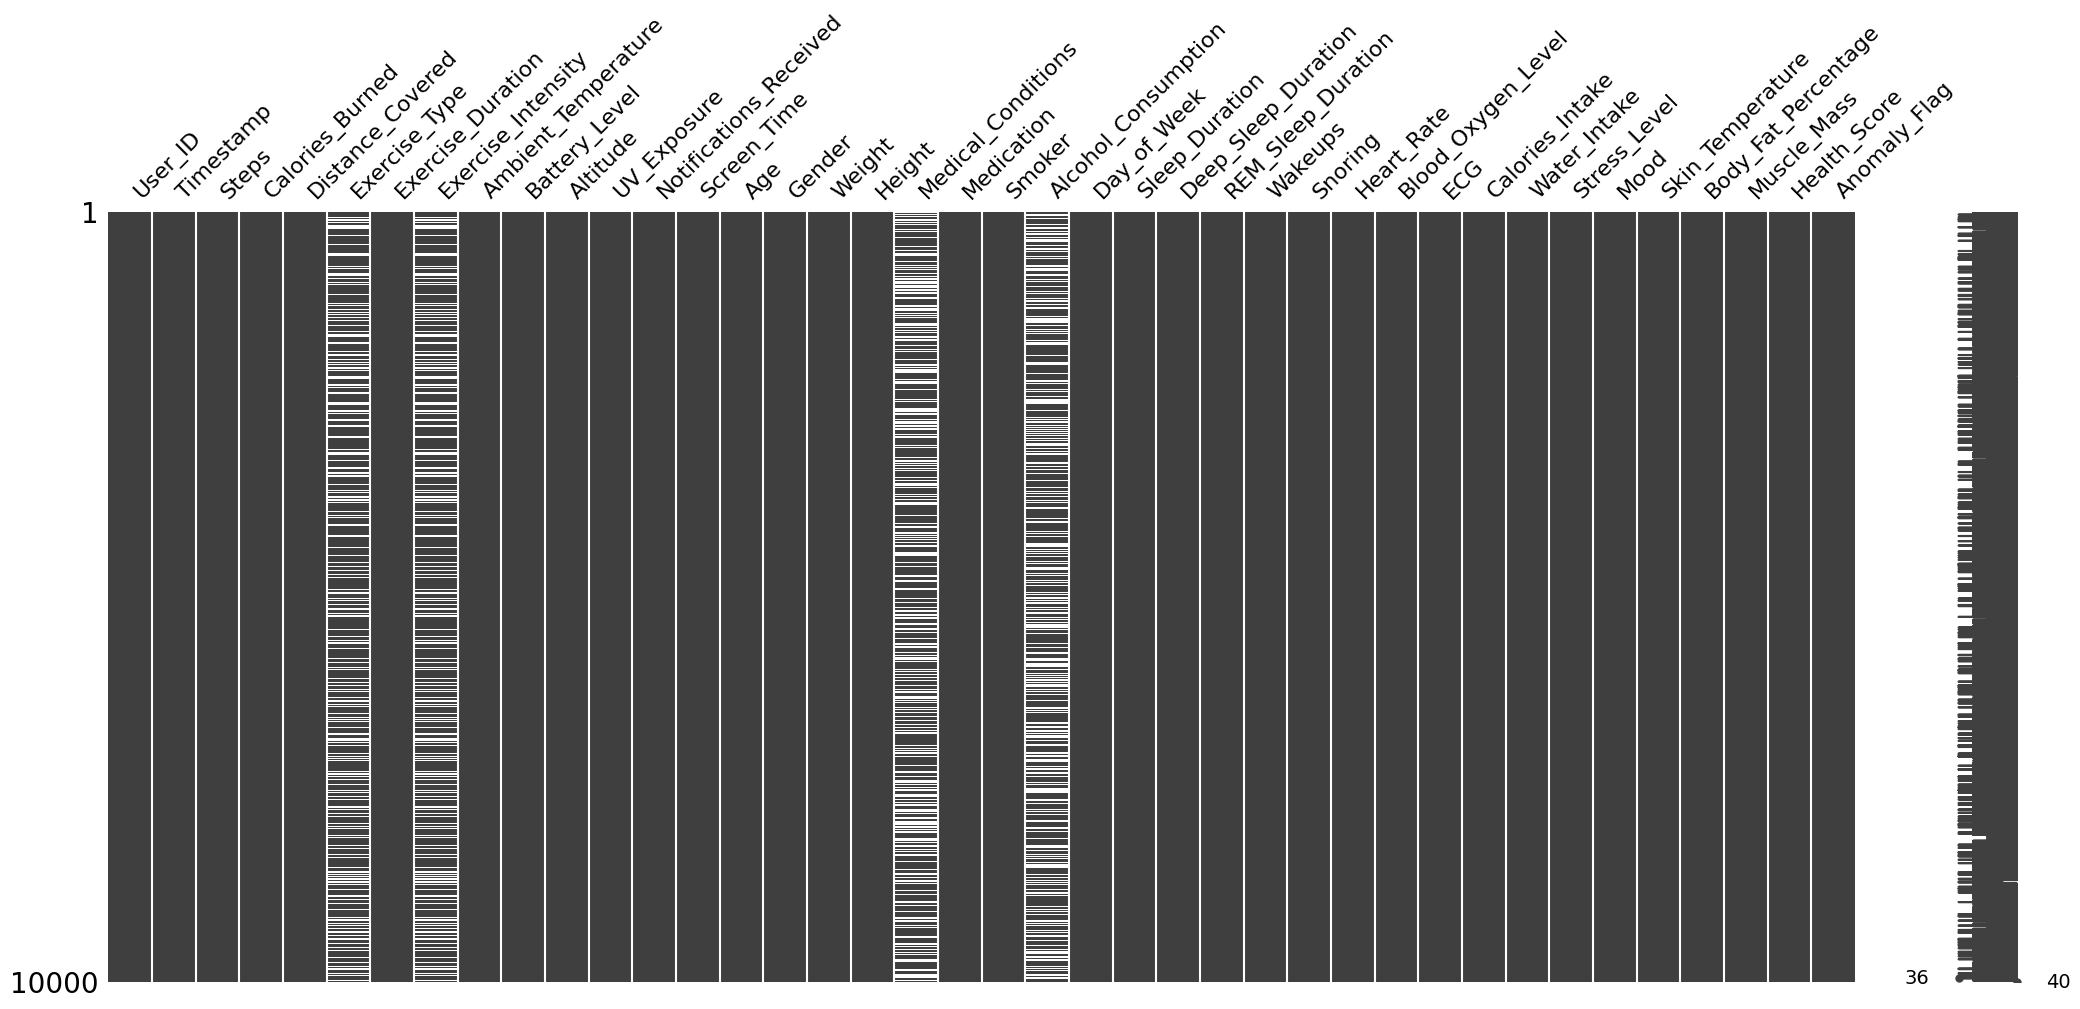

In [11]:
msno.matrix(df)


## Missing value handling


In [12]:
# Replacing 'NA' string values with np.nan to recognize them as NaN values
df.replace('NA', np.nan, inplace=True)

# Creating a new column 'nan_count' that contains the count of NaNs per row
df['nan_count'] = df.isna().sum(axis=1)

# Sorting the DataFrame based on 'nan_count' in descending order
df = df.sort_values(by='nan_count', ascending=False)
df_not_useable = df[df['nan_count'] >= 12]
df_not_useable.to_csv('data/all_columns_none.csv')
df = df[df['nan_count'] < 12]
df.drop(columns=['nan_count'], inplace=True)

print(f"all columns are none: {df_not_useable.shape[0]}")

all columns are none: 0


In [13]:
df_Exercise_Type_is_none = df[df['Exercise_Type'].isna()] 
df_Exercise_Type_is_none.to_csv('data/df_Exercise_Type_is_none.csv')

df_Exercise_Intensity_is_none = df[df['Exercise_Intensity'].isna()] 
df_Exercise_Intensity_is_none.to_csv('data/df_Exercise_Intensity_is_none.csv')

df_Medical_Conditions_is_none = df[df['Medical_Conditions'].isna()] 
df_Medical_Conditions_is_none.to_csv('data/df_Medical_Conditions_is_none.csv')

df_Alcohol_Consumption_is_none = df[df['Alcohol_Consumption'].isna()] 
df_Alcohol_Consumption_is_none.to_csv('data/df_MAlcohol_Consumption_is_none.csv')

# Removing rows where 'Exercise_Type', 'Exercise_Intensity', 'Medical_Conditions', and 'Alcohol_Consumption' are all null
df = df.dropna(subset=['Exercise_Type', 'Exercise_Intensity', 'Medical_Conditions', 'Alcohol_Consumption'], how='all')



In [14]:
df

,User_ID,Timestamp,Steps,Calories_Burned,Distance_Covered,Exercise_Type,Exercise_Duration,Exercise_Intensity,Ambient_Temperature,Battery_Level,...,ECG,Calories_Intake,Water_Intake,Stress_Level,Mood,Skin_Temperature,Body_Fat_Percentage,Muscle_Mass,Health_Score,Anomaly_Flag
1366,U_01367,2021-02-26 22:00:00,10802,540.10,8.6416,NaN,0.000000,NaN,25.032168,14.235373,...,Normal,1849.836175,1.523465,Moderate,Sad,33.189491,26.048697,40.383053,22.892767,1
1363,U_01364,2021-02-26 19:00:00,9762,488.10,7.8096,NaN,0.000000,NaN,26.170361,80.332346,...,Normal,2141.444538,0.605992,Low,Anxious,37.473872,30.307829,75.388031,51.756538,0
5444,U_05445,2021-08-15 20:00:00,3175,158.75,2.5400,NaN,0.000000,NaN,18.977870,72.485470,...,Normal,2483.002211,1.730166,High,Happy,38.773020,11.410446,53.435338,16.673632,1
3374,U_03375,2021-05-21 14:00:00,15235,761.75,12.1880,NaN,0.000000,NaN,39.517569,44.183035,...,Normal,1768.212870,3.443215,Moderate,Anxious,36.975231,17.258768,69.037620,37.013994,0
3352,U_03353,2021-05-20 16:00:00,15195,759.75,12.1560,NaN,0.000000,NaN,20.491997,31.118779,...,Abnormal,2300.883139,2.072788,Moderate,Happy,38.211555,23.466601,48.137690,50.209355,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,U_05016,2021-07-28 23:00:00,761,38.05,0.6088,Running,1.803182,High,26.334792,89.723670,...,Abnormal,1376.355800,2.413106,High,Sad,37.912525,20.718146,30.665871,68.593505,1
5010,U_05011,2021-07-28 18:00:00,16480,824.00,13.1840,Yoga,1.820554,Moderate,32.592704,0.828631,...,Normal,2104.983501,2.755918,Low,Sad,37.727440,23.775384,34.012820,72.449363,0
5009,U_05010,2021-07-28 17:00:00,15772,788.60,12.6176,Yoga,0.861244,Low,17.092213,68.236892,...,Abnormal,2404.047922,2.647764,Moderate,Sad,33.086414,18.736616,44.250202,46.225940,1
5004,U_05005,2021-07-28 12:00:00,12674,633.70,10.1392,Running,0.566163,Moderate,23.865174,28.481606,...,Normal,2220.062806,1.369642,High,Neutral,35.696797,19.387242,58.704228,26.942932,0


In [15]:
exercise_type_replacement = df['Exercise_Type'].mode()[0]
exercise_intensity_replacement = df['Exercise_Intensity'].mode()[0]
medical_conditions_replacement = df['Medical_Conditions'].mode()[0]
alcohol_consumption_replacement = df['Alcohol_Consumption'].mode()[0]

# Replacing null values in 'Exercise_Type' column
df['Exercise_Type'].fillna(exercise_type_replacement, inplace=True)

# Replacing null values in 'Exercise_Intensity' column
df['Exercise_Intensity'].fillna(exercise_intensity_replacement, inplace=True)

# Replacing null values in 'Medical_Conditions' column
df['Medical_Conditions'].fillna(medical_conditions_replacement, inplace=True)

# Replacing null values in 'Alcohol_Consumption' column
df['Alcohol_Consumption'].fillna(alcohol_consumption_replacement, inplace=True)


In [17]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Analysis")

profile.to_file("analysis.html")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Summarize dataset:  89%|████████▉ | 42/47 [00:00<00:00, 50.43it/s, Calculate auto correlation]             /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Moderate'')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 96.77i

# User Behavior Analysis:
- How does the number of notifications received impact the screen time?

The correlation between the number of notifications received and screen time is 0.0030220213225279624


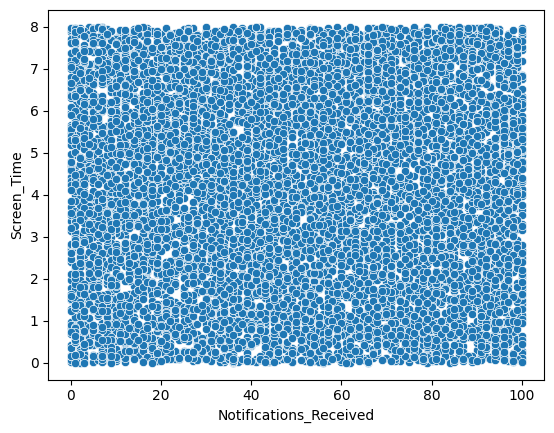

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check the correlation
correlation = df['Notifications_Received'].corr(df['Screen_Time'])

print(f'The correlation between the number of notifications received and screen time is {correlation}')

# Plot the data
sns.scatterplot(data=df, x='Notifications_Received', y='Screen_Time')
plt.show()


- A value of 0 indicates no correlation. The value, 0.003, is very close to 0, which suggests that there is almost no linear correlation between the number of notifications received and screen time.
- Since the value is positive, this suggests that, to a very small extent, screen time increases as the number of notifications increases.
- But because the correlation is so close to 0, it’s safe to say that there is essentially no relationship between the number of notifications received and screen time, at least not a linear one. There could be a non-linear relationship, or other factors could be influencing screen time.

# To check for a non-linear correlation, we can use Spearman rank and kendall correlation

In [17]:
spearman_corr = df['Notifications_Received'].corr(df['Screen_Time'], method='spearman')
print(f'The Spearman rank correlation is {spearman_corr}')


The Spearman rank correlation is 0.0029106593552019043


The value, 0.0029, is very close to 0, which suggests that there is almost no correlation between the number of notifications received and screen time.

In [18]:
# Calculate Kendall rank correlation
kendall_corr = df['Notifications_Received'].corr(df['Screen_Time'], method='kendall')
print(f'The Kendall rank correlation is {kendall_corr}')

The Kendall rank correlation is 0.0019468852975425277


In [19]:
df

,User_ID,Timestamp,Steps,Calories_Burned,Distance_Covered,Exercise_Type,Exercise_Duration,Exercise_Intensity,Ambient_Temperature,Battery_Level,...,ECG,Calories_Intake,Water_Intake,Stress_Level,Mood,Skin_Temperature,Body_Fat_Percentage,Muscle_Mass,Health_Score,Anomaly_Flag
1366,U_01367,2021-02-26 22:00:00,10802,540.10,8.6416,Yoga,0.000000,Moderate,25.032168,14.235373,...,Normal,1849.836175,1.523465,Moderate,Sad,33.189491,26.048697,40.383053,22.892767,1
1363,U_01364,2021-02-26 19:00:00,9762,488.10,7.8096,Yoga,0.000000,Moderate,26.170361,80.332346,...,Normal,2141.444538,0.605992,Low,Anxious,37.473872,30.307829,75.388031,51.756538,0
5444,U_05445,2021-08-15 20:00:00,3175,158.75,2.5400,Yoga,0.000000,Moderate,18.977870,72.485470,...,Normal,2483.002211,1.730166,High,Happy,38.773020,11.410446,53.435338,16.673632,1
3374,U_03375,2021-05-21 14:00:00,15235,761.75,12.1880,Yoga,0.000000,Moderate,39.517569,44.183035,...,Normal,1768.212870,3.443215,Moderate,Anxious,36.975231,17.258768,69.037620,37.013994,0
3352,U_03353,2021-05-20 16:00:00,15195,759.75,12.1560,Yoga,0.000000,Moderate,20.491997,31.118779,...,Abnormal,2300.883139,2.072788,Moderate,Happy,38.211555,23.466601,48.137690,50.209355,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,U_05016,2021-07-28 23:00:00,761,38.05,0.6088,Running,1.803182,High,26.334792,89.723670,...,Abnormal,1376.355800,2.413106,High,Sad,37.912525,20.718146,30.665871,68.593505,1
5010,U_05011,2021-07-28 18:00:00,16480,824.00,13.1840,Yoga,1.820554,Moderate,32.592704,0.828631,...,Normal,2104.983501,2.755918,Low,Sad,37.727440,23.775384,34.012820,72.449363,0
5009,U_05010,2021-07-28 17:00:00,15772,788.60,12.6176,Yoga,0.861244,Low,17.092213,68.236892,...,Abnormal,2404.047922,2.647764,Moderate,Sad,33.086414,18.736616,44.250202,46.225940,1
5004,U_05005,2021-07-28 12:00:00,12674,633.70,10.1392,Running,0.566163,Moderate,23.865174,28.481606,...,Normal,2220.062806,1.369642,High,Neutral,35.696797,19.387242,58.704228,26.942932,0


# So the number of notifications received does not impact the screen time. 

### User Behavior Analysis:
- Is there a correlation between the day of the week and screen time?

In [20]:
# Convert 'Day_of_Week' to numerical format
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df['Day_of_Week'] = df['Day_of_Week'].map(day_mapping)

In [21]:
df

,User_ID,Timestamp,Steps,Calories_Burned,Distance_Covered,Exercise_Type,Exercise_Duration,Exercise_Intensity,Ambient_Temperature,Battery_Level,...,ECG,Calories_Intake,Water_Intake,Stress_Level,Mood,Skin_Temperature,Body_Fat_Percentage,Muscle_Mass,Health_Score,Anomaly_Flag
1366,U_01367,2021-02-26 22:00:00,10802,540.10,8.6416,Yoga,0.000000,Moderate,25.032168,14.235373,...,Normal,1849.836175,1.523465,Moderate,Sad,33.189491,26.048697,40.383053,22.892767,1
1363,U_01364,2021-02-26 19:00:00,9762,488.10,7.8096,Yoga,0.000000,Moderate,26.170361,80.332346,...,Normal,2141.444538,0.605992,Low,Anxious,37.473872,30.307829,75.388031,51.756538,0
5444,U_05445,2021-08-15 20:00:00,3175,158.75,2.5400,Yoga,0.000000,Moderate,18.977870,72.485470,...,Normal,2483.002211,1.730166,High,Happy,38.773020,11.410446,53.435338,16.673632,1
3374,U_03375,2021-05-21 14:00:00,15235,761.75,12.1880,Yoga,0.000000,Moderate,39.517569,44.183035,...,Normal,1768.212870,3.443215,Moderate,Anxious,36.975231,17.258768,69.037620,37.013994,0
3352,U_03353,2021-05-20 16:00:00,15195,759.75,12.1560,Yoga,0.000000,Moderate,20.491997,31.118779,...,Abnormal,2300.883139,2.072788,Moderate,Happy,38.211555,23.466601,48.137690,50.209355,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,U_05016,2021-07-28 23:00:00,761,38.05,0.6088,Running,1.803182,High,26.334792,89.723670,...,Abnormal,1376.355800,2.413106,High,Sad,37.912525,20.718146,30.665871,68.593505,1
5010,U_05011,2021-07-28 18:00:00,16480,824.00,13.1840,Yoga,1.820554,Moderate,32.592704,0.828631,...,Normal,2104.983501,2.755918,Low,Sad,37.727440,23.775384,34.012820,72.449363,0
5009,U_05010,2021-07-28 17:00:00,15772,788.60,12.6176,Yoga,0.861244,Low,17.092213,68.236892,...,Abnormal,2404.047922,2.647764,Moderate,Sad,33.086414,18.736616,44.250202,46.225940,1
5004,U_05005,2021-07-28 12:00:00,12674,633.70,10.1392,Running,0.566163,Moderate,23.865174,28.481606,...,Normal,2220.062806,1.369642,High,Neutral,35.696797,19.387242,58.704228,26.942932,0


In [24]:
# Calculate correlation
correlation = df['Day_of_Week'].corr(df['Screen_Time'])
print(f'The correlation between the day of the week and screen time is {correlation}')


The correlation between the day of the week and screen time is 0.0006975930103678277


We can say that there is essentially no relationship between the day of the week and screen time, at least not a linear one. 

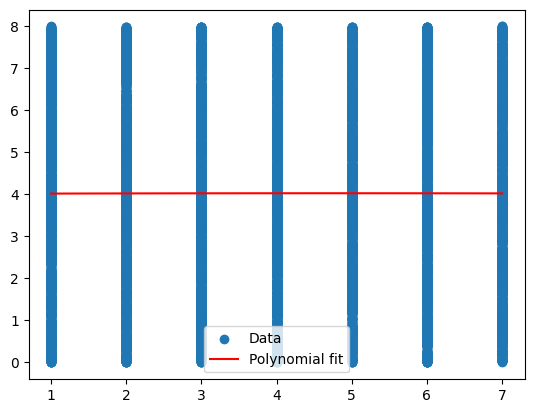

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Fit a polynomial of degree 2 (change this to fit higher degree polynomials)
coefficients = np.polyfit(df['Day_of_Week'], df['Screen_Time'], 2)

# Generate a range of x values
x_values = np.linspace(df['Day_of_Week'].min(), df['Day_of_Week'].max(), 100)

# Compute the corresponding y values
y_values = np.polyval(coefficients, x_values)

# Plot the original data and the polynomial fit
plt.scatter(df['Day_of_Week'], df['Screen_Time'], label='Data')
plt.plot(x_values, y_values, color='red', label='Polynomial fit')
plt.legend()
plt.show()
